# Центральная предельная теорема своими руками

In [23]:
# import external libraries
%matplotlib inline

import numpy as np
from scipy.stats import chi2, norm, sts
import matplotlib.pyplot as plt
import itertools

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Я выбрал распределение $\chi^2$ (хи-квадрат) с $k$ степенями свободы -
<a  href="https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82"> Wikipedia </a> 

In [81]:
#
k = 8

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

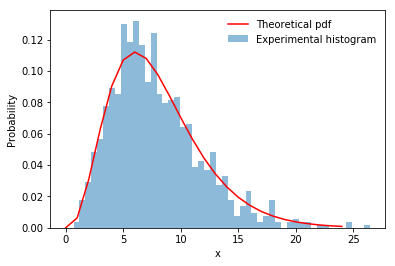

In [87]:
# сгенерируем выборку из 1000 элементов и построим гистограмму
sample = chi2.rvs(k, size=1000)
plt.hist(sample, 50, normed=True, alpha=0.5, label='Experimental histogram')

# теперь построим теоретическую плотность распределения поверх начального графика
x = np.arange(0.,25.,1)
plt.plot(x, chi2.pdf(x, k),'r', alpha=1, label='Theoretical pdf')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

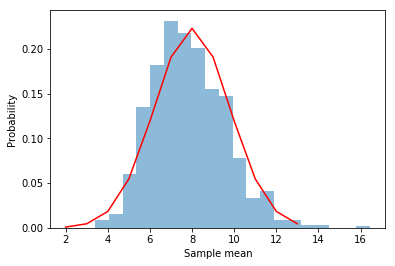

In [89]:
# вычисляется среднее из 1000 выборок
smeans = []
for i in range(1000):
    smeans.append(chi2(k).rvs(5).mean())
# и вырисовывается на графике
plt.hist(smeans, 20, normed=True, alpha=0.5, label='sample means histogram')
# вычисляется pdf нормального распределения
norm_rv = sts.norm(k, np.sqrt(2 * k / 5.))
x = np.arange(2.,14.,1)
plt.plot(x, norm.pdf(x, k, np.sqrt(2 * k/ 5.)), 'r', alpha=1, label='norm theoretical pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')
plt.show()

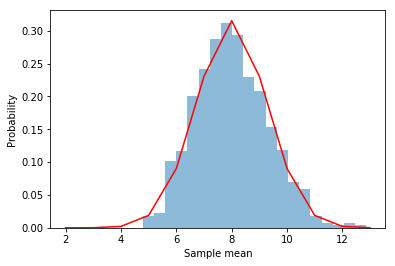

In [90]:
# вычисляется среднее из 1000 выборок
smeans = []
for i in range(1000):
    smeans.append(chi2(k).rvs(10).mean())
# и вырисовывается на графике
plt.hist(smeans, 20, normed=True, alpha=0.5, label='sample means histogram')
# вычисляется pdf нормального распределения
norm_rv = sts.norm(k, np.sqrt(2 * k / 10.))
x = np.arange(2.,14.,1)
plt.plot(x, norm.pdf(x, k, np.sqrt(2 * k/ 10.)), 'r', alpha=1, label='norm theoretical pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')
plt.show()

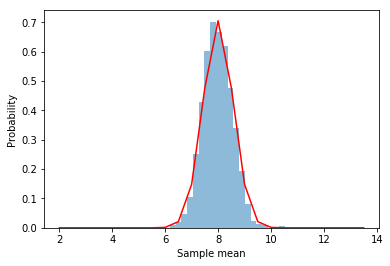

In [91]:
# вычисляется среднее из 1000 выборок
smeans = []
for i in range(1000):
    smeans.append(chi2(k).rvs(50).mean())
# и вырисовывается на графике
plt.hist(smeans, 20, normed=True, alpha=0.5, label='sample means histogram')
# вычисляется pdf нормального распределения
norm_rv = sts.norm(k, np.sqrt(2 * k / 50.))
x = np.arange(2.,14.,0.5)
plt.plot(x, norm.pdf(x, k, np.sqrt(2 * k/ 50.)), 'r', alpha=1, label='norm theoretical pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')
plt.show()

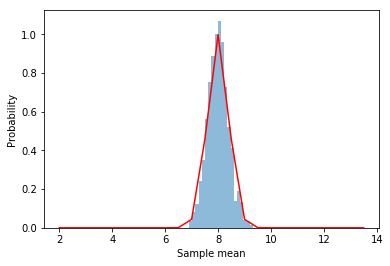

In [92]:
# вычисляется среднее из 1000 выборок
smeans = []
for i in range(1000):
    smeans.append(chi2(k).rvs(100).mean())
# и вырисовывается на графике
plt.hist(smeans, 20, normed=True, alpha=0.5, label='sample means histogram')
# вычисляется pdf нормального распределения
norm_rv = sts.norm(k, np.sqrt(2 * k / 100.))
x = np.arange(2.,14.,0.5)
plt.plot(x, norm.pdf(x, k, np.sqrt(2 * k/ 100.)), 'r', alpha=1, label='norm theoretical pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')
plt.show()

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

При увеличении размера выборки n, распределение средних значений начинает сходиться к k = 8, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет. При увеличении размера выборки гистограмма начинает точнее напоминать нормальное распределение.